## Load modules

In [25]:
import numpy as np
import imp
import ens_snapshot_tools as ens
import matplotlib.pyplot as plt

import pandas as pd
# for debugging
# imp.reload(ens)

# Luke's
import utils #utils file with functions
import warnings
warnings.filterwarnings('ignore')
import os
import glob
import numpy as np
import xarray as xr
import xesmf as xe
from scipy import stats
from scipy import signal
import time as tm #we run into conflicts if we call 'time' from the cesm time
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature
from cartopy.util import add_cyclic_point
%matplotlib inline
import cartopy.util as cutil
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.basemap import Basemap, maskoceans
import matplotlib.cm as cm

import utils

## Luke's system-specific file paths here

In [3]:
DATAPATH_MMR  =    '/Users/lukeaparsons/Documents/Data/CESM/CESM_LME/MMR_VolcForcing/'

SAVEPATH  =    '/Users/lukeaparsons/python/SEOFs/output/'
FIGUREPATH  =  '/Users/lukeaparsons/python/SEOFs/figures/'

## Load LME IVI forcing file

In [31]:
ds = xr.open_dataset(DATAPATH_MMR + 'IVI2LoadingLatHeight501-2000_L18_c20100518.nc') #load forcing file
LAT = ds['lat'][:]
lev = ds['lev'][:]

ds_MMRVOLC = ds['MMRVOLC'][:,:,:]
ds_MMRVOLC_levmean = ds_MMRVOLC.mean(dim='lev')
ds_MMRVOLC_levmean_weighted = utils.weightdata(ds,ds_MMRVOLC_levmean) #use function to latitude weight data
ds_MMRVOLC_levmean_weighted_areamean = ds_MMRVOLC_levmean_weighted.mean(dim='lat')

## plot monthly data to check if weighting, averaging messed up data

Text(0, 0.5, 'MMR IVI')

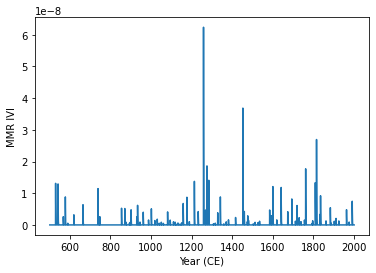

In [55]:
plt.plot(ds_MMRVOLC_levmean_weighted_areamean['time'],ds_MMRVOLC_levmean_weighted_areamean)
plt.xlabel('Year (CE)')
plt.ylabel('MMR IVI')

In [67]:
#truncate data to remote dec 500, jan 2001 (at least according to dates in xarray)
ds_MMRVOLC_levmean_weighted_areamean_trunc = ds_MMRVOLC_levmean_weighted_areamean[1:18001]
time_trunc = ds_MMRVOLC_levmean_weighted_areamean['time'][1:18001]

## now take annual mean of 12 months of data

In [79]:
nyrs = int(ds_MMRVOLC_levmean_weighted_areamean_trunc.shape[0]/12)

ds_MMRVOLC_levmean_weighted_areamean_trunc_annual = np.empty([nyrs, 1])
time_annual = np.empty([nyrs, 1])

index = 0
for tt in np.arange(0,nyrs,1):
    
    OneYear = ds_MMRVOLC_levmean_weighted_areamean_trunc[index:index+12]
    ds_MMRVOLC_levmean_weighted_areamean_trunc_annual[tt] = OneYear.mean(dim='time')
    
    OneYearTime = time_trunc[index:index+12]
    time_annual[tt] = int(np.floor(OneYearTime.mean(dim='time')))
    
    index = index + 12

## plot annual data to check

Text(0, 0.5, 'MMR IVI')

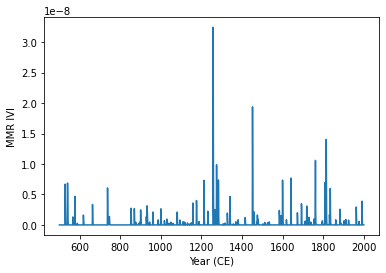

In [80]:
plt.plot(time_annual,ds_MMRVOLC_levmean_weighted_areamean_trunc_annual)
plt.xlabel('Year (CE)')
plt.ylabel('MMR IVI')

## Save annualized

In [86]:
np.savez(SAVEPATH + 'IVI2Loading_Annual',
         time_annual = time_annual,
         MMRVOLC_ANN = ds_MMRVOLC_levmean_weighted_areamean_trunc_annual)